# Preprocessed Data EDA - What Models Will See

This notebook analyzes the data **AFTER** preprocessing has been applied, showing exactly what the machine learning models will see during training.

## Key Analysis Points:
1. **Feature Engineering Results** - What new features were created
2. **Data Transformation Effects** - How encoding and scaling changed the data
3. **Feature Selection Impact** - Which features were selected for modeling
4. **Class Imbalance Status** - Distribution after resampling
5. **Data Quality After Preprocessing** - Final data quality checks
6. **Model-Ready Data Characteristics** - What models will actually train on

## Data Flow:
```
Raw Data → Data Loader (Cleaning) → Preprocessing (Feature Engineering + Transform) → Model Training
```

This EDA focuses on the **Preprocessing Output** step.

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load and Setup Components

In [18]:
# Add src to path for imports
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / "src"))

# Import project modules
import sys
sys.path.append('..')
from src.data_loader import DataLoader
from src.preprocess import DataPreprocessor

## 2. Load Cleaned Data (Input to Preprocessing)

In [19]:
# Initialize data loader
data_loader = DataLoader()

# Load all datasets
print("Loading cleaned data from data loader...")
datasets = data_loader.load_all_datasets()

# Get the fraud dataset with geolocation
raw_cleaned_data = datasets["fraud_data_with_geo"]

print(f"✅ Loaded cleaned data: {raw_cleaned_data.shape}")
print(f"   Columns: {list(raw_cleaned_data.columns)}")
print(f"   Target column: {'class' if 'class' in raw_cleaned_data.columns else 'Class'}")

# Display first few rows
raw_cleaned_data.head()

2025-07-20 08:07:46,508 - data_loader - INFO - Initialized DataLoader with data directory: c:\Users\Cyber Defense\Desktop\week8\fraud-detection\notebooks\..\data\raw
Loading cleaned data from data loader...
2025-07-20 08:07:46,508 - data_loader - INFO - Loading all fraud detection datasets
2025-07-20 08:07:46,511 - data_loader - INFO - Loading e-commerce fraud dataset
2025-07-20 08:07:46,511 - data_loader - INFO - Loading CSV file: Fraud_Data.csv (Size: 0.11 MB)
2025-07-20 08:07:46,518 - data_loader - INFO - Successfully loaded data: 1000 rows, 11 columns
2025-07-20 08:07:46,520 - data_loader - INFO - Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
2025-07-20 08:07:46,520 - data_loader - INFO - Starting comprehensive data cleaning for fraud dataset
2025-07-20 08:07:46,528 - data_loader - WARNING - Removing 2 extreme purchase_value outliers
2025-07-20 08:07:46,536 - data_loader - INFO - Class d

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,user_0,2023-01-01 00:00:00,2023-01-05 07:00:00,68.118202,device_0,Ads,Chrome,F,44,192.168.18.188,0,United States
1,user_1,2023-01-01 01:00:00,2023-01-04 22:00:00,140.500957,device_1,Social,Chrome,M,32,192.168.88.244,0,United States
2,user_2,2023-01-01 02:00:00,2023-01-01 17:00:00,10.860581,device_2,Direct,Firefox,F,42,192.168.125.73,0,United States
3,user_3,2023-01-01 03:00:00,2023-01-05 14:00:00,76.890866,device_3,SEO,Edge,M,25,192.168.223.15,0,United States
4,user_4,2023-01-01 04:00:00,2023-01-04 04:00:00,47.613690,device_4,SEO,Firefox,F,38,192.168.4.191,0,United States


## 3. Apply Preprocessing Pipeline

In [20]:
# Initialize preprocessor
preprocessor = DataPreprocessor()

# Determine target column
target_col = 'class' if 'class' in raw_cleaned_data.columns else 'Class'

print(f"Target column: {target_col}")
print("Applying complete preprocessing pipeline...")

# Apply complete preprocessing pipeline
preprocessed_data = preprocessor.fit_transform(raw_cleaned_data, target_col)

print(f"✅ Preprocessing completed: {raw_cleaned_data.shape} → {preprocessed_data.shape}")
print(f"   Original features: {raw_cleaned_data.shape[1]}")
print(f"   Final features: {preprocessed_data.shape[1]}")

# Display first few rows of preprocessed data
preprocessed_data.head()

2025-07-20 08:07:46,805 - preprocessor - INFO - Initialized DataPreprocessor
Target column: class
Applying complete preprocessing pipeline...
2025-07-20 08:07:46,810 - preprocessor - INFO - Starting fit_transform pipeline
2025-07-20 08:07:46,812 - preprocessor - INFO - Starting data cleaning process
2025-07-20 08:07:46,818 - preprocessor - INFO - Removed 0 duplicate rows
2025-07-20 08:07:46,821 - preprocessor - INFO - Data cleaning completed. Final shape: (998, 12)
2025-07-20 08:07:46,824 - preprocessor - INFO - Starting feature engineering
2025-07-20 08:07:46,824 - preprocessor - INFO - Detected e-commerce fraud dataset - creating e-commerce specific features
2025-07-20 08:07:46,836 - preprocessor - INFO - Created time-based features for e-commerce data
2025-07-20 08:07:46,844 - preprocessor - INFO - Created purchase value features
2025-07-20 08:07:46,849 - preprocessor - INFO - Created user behavior features
2025-07-20 08:07:46,858 - preprocessor - INFO - Created device behavior feat

,user_id,purchase_value,device_id,source,browser,age,ip_address,signup_hour,signup_weekday,purchase_hour,...,hours_to_purchase,purchase_value_log,user_avg_purchase_value,source_encoded,browser_encoded,age_group,age_group_encoded,sex_encoded,ip_usage_count,class
0,-1.730316,-0.315921,-1.730316,-1.373727,-1.285367,0.948635,-0.521485,-1.653796,1.506238,-0.704964,...,0.359673,0.132853,-0.315921,-1.373727,-1.285367,-1.127253,0.803790,-1.053535,-0.110319,-0.241505
1,-1.726845,0.470904,-1.726845,1.272951,-1.285367,-0.255355,1.554964,-1.509118,1.506238,1.513050,...,0.154251,0.751252,0.470904,1.272951,-1.285367,1.125748,-0.393497,0.949185,-0.110319,-0.241505
2,-1.341559,-0.938330,-1.341559,-0.491501,0.504998,0.747970,-1.292737,-1.364440,1.506238,0.773712,...,-1.448036,-1.388438,-0.938330,-0.491501,0.504998,-1.127253,0.803790,-1.053535,-0.110319,-0.241505
3,-0.963215,-0.220559,-0.963215,0.390725,-0.390185,-0.957684,0.183461,-1.219761,1.506238,0.330109,...,0.441841,0.235985,-0.220559,0.390725,-0.390185,0.374748,-1.590784,0.949185,-0.110319,-0.241505
4,-0.577929,-0.538811,-0.577929,0.390725,0.504998,0.346640,0.794181,-1.075083,1.506238,-1.148567,...,-0.277134,-0.170881,-0.538811,0.390725,0.504998,-1.127253,0.803790,-1.053535,-0.110319,-0.241505


## 4. Feature Engineering Analysis

In [21]:
# Analyze feature engineering results
original_cols = set(raw_cleaned_data.columns)
final_cols = set(preprocessed_data.columns)
new_features = final_cols - original_cols
removed_features = original_cols - final_cols

print("🔍 FEATURE ENGINEERING ANALYSIS")
print("=" * 50)
print(f"Original features: {len(original_cols)}")
print(f"Final features: {len(final_cols)}")
print(f"New engineered features: {len(new_features)}")
print(f"Removed features: {len(removed_features)}")

if new_features:
    print(f"\n✅ New features created:")
    for feature in sorted(new_features):
        print(f"   • {feature}")

if removed_features:
    print(f"\n❌ Features removed:")
    for feature in sorted(removed_features):
        print(f"   • {feature}")

# Show feature categories
print(f"\n📊 FEATURE CATEGORIES")
print("-" * 30)

feature_cols = [col for col in preprocessed_data.columns if col != target_col]
numerical_cols = preprocessed_data[feature_cols].select_dtypes(include=[np.number]).columns
categorical_cols = preprocessed_data[feature_cols].select_dtypes(include=['object', 'category']).columns

print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")
print(f"Total features: {len(feature_cols)}")

🔍 FEATURE ENGINEERING ANALYSIS
Original features: 12
Final features: 21
New engineered features: 13
Removed features: 4

✅ New features created:
   • age_group
   • age_group_encoded
   • browser_encoded
   • days_to_purchase
   • hours_to_purchase
   • ip_usage_count
   • purchase_hour
   • purchase_value_log
   • sex_encoded
   • signup_hour
   • signup_weekday
   • source_encoded
   • user_avg_purchase_value

❌ Features removed:
   • country
   • purchase_time
   • sex
   • signup_time

📊 FEATURE CATEGORIES
------------------------------
Numerical features: 20
Categorical features: 0
Total features: 20


## 5. Data Types and Quality Analysis

In [22]:
# Data types analysis
print("🔍 DATA TYPES AFTER PREPROCESSING")
print("=" * 50)

print("Final data types:")
for col, dtype in preprocessed_data.dtypes.items():
    print(f"  {col}: {dtype}")

# Missing values check
print(f"\n🔍 MISSING VALUES CHECK")
print("-" * 30)
missing_counts = preprocessed_data.isnull().sum()
if missing_counts.sum() == 0:
    print("✅ No missing values in preprocessed data")
else:
    print("❌ Missing values found:")
    for col, count in missing_counts[missing_counts > 0].items():
        print(f"  {col}: {count}")

# Data quality summary
print(f"\n📊 DATA QUALITY SUMMARY")
print("-" * 30)
print(f"Total rows: {len(preprocessed_data)}")
print(f"Total columns: {len(preprocessed_data.columns)}")
print(f"Memory usage: {preprocessed_data.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Duplicate rows: {preprocessed_data.duplicated().sum()}")

🔍 DATA TYPES AFTER PREPROCESSING
Final data types:
  user_id: float64
  purchase_value: float64
  device_id: float64
  source: float64
  browser: float64
  age: float64
  ip_address: float64
  signup_hour: float64
  signup_weekday: float64
  purchase_hour: float64
  days_to_purchase: float64
  hours_to_purchase: float64
  purchase_value_log: float64
  user_avg_purchase_value: float64
  source_encoded: float64
  browser_encoded: float64
  age_group: float64
  age_group_encoded: float64
  sex_encoded: float64
  ip_usage_count: float64
  class: float64

🔍 MISSING VALUES CHECK
------------------------------
✅ No missing values in preprocessed data

📊 DATA QUALITY SUMMARY
------------------------------
Total rows: 998
Total columns: 21
Memory usage: 171.53 KB
Duplicate rows: 0


## 6. Target Distribution Analysis

🔍 TARGET DISTRIBUTION ANALYSIS
Target distribution (before resampling):
  Class -0.24150465065592658: 943 (94.49%)
  Class 4.140707010337068: 55 (5.51%)


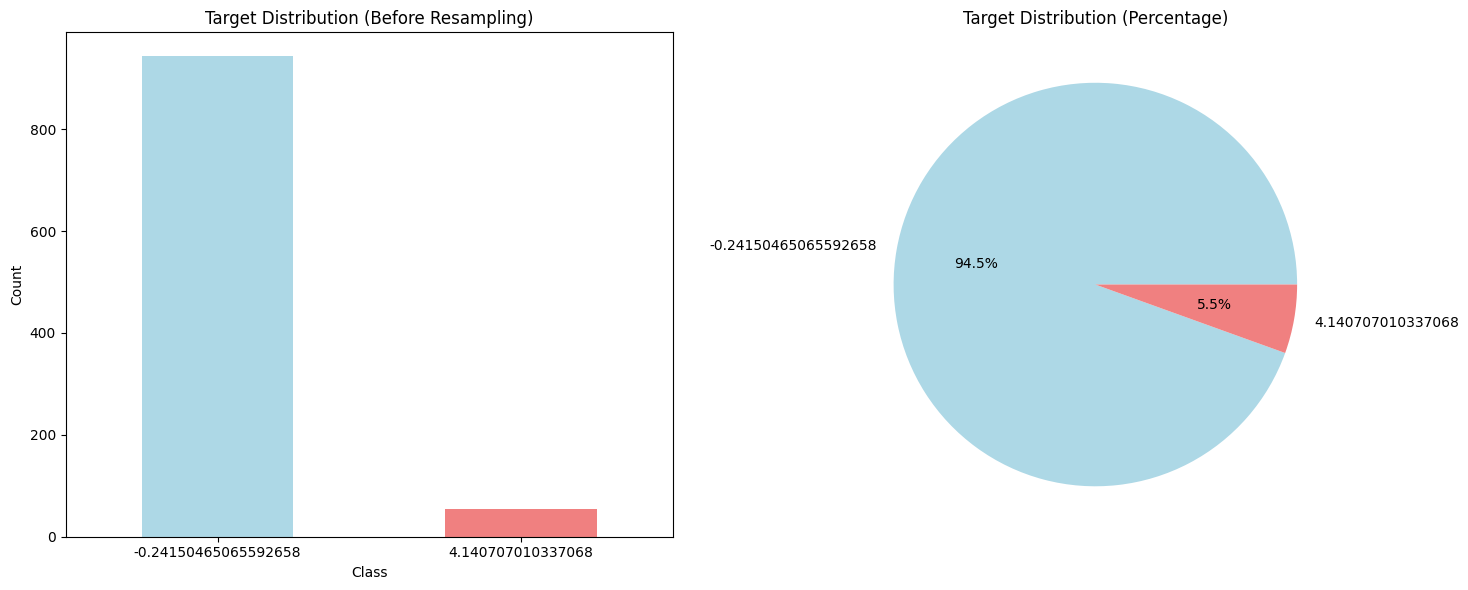


📊 IMBALANCE METRICS
--------------------
Fraud class value: 4.140707010337068
Fraud rate: 0.055 (5.5%)
Imbalance ratio: 1:17.1
⚠️  Highly imbalanced dataset (fraud rate < 10%)


In [23]:
# Target distribution analysis
print("🔍 TARGET DISTRIBUTION ANALYSIS")
print("=" * 50)

target_dist = preprocessed_data[target_col].value_counts()
print("Target distribution (before resampling):")
for class_val, count in target_dist.items():
    percentage = (count / len(preprocessed_data)) * 100
    print(f"  Class {class_val}: {count} ({percentage:.2f}%)")

# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_dist.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Target Distribution (Before Resampling)')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'])
ax2.set_title('Target Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Calculate imbalance metrics - FIXED VERSION
print(f"\n📊 IMBALANCE METRICS")
print("-" * 20)

# Get the fraud class value (might not be exactly 1)
fraud_class = target_dist.index[target_dist.index != target_dist.index[0]][0] if len(target_dist) > 1 else target_dist.index[0]
fraud_rate = target_dist[fraud_class] / len(preprocessed_data)

print(f"Fraud class value: {fraud_class}")
print(f"Fraud rate: {fraud_rate:.3f} ({fraud_rate*100:.1f}%)")
print(f"Imbalance ratio: 1:{target_dist.iloc[0]/target_dist.iloc[1]:.1f}")

if fraud_rate < 0.1:
    print("⚠️  Highly imbalanced dataset (fraud rate < 10%)")
elif fraud_rate < 0.3:
    print("⚠️  Moderately imbalanced dataset (fraud rate < 30%)")
else:
    print("✅ Relatively balanced dataset")

## 7. Feature Statistics Analysis

In [24]:
# Feature statistics
print("🔍 FEATURE STATISTICS")
print("=" * 50)

feature_cols = [col for col in preprocessed_data.columns if col != target_col]
numerical_cols = preprocessed_data[feature_cols].select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    print(f"Numerical features ({len(numerical_cols)}):")
    stats = preprocessed_data[numerical_cols].describe()
    display(stats.round(3))
    
    # Check for outliers in numerical features
    print(f"\n🔍 OUTLIER ANALYSIS")
    print("-" * 20)
    
    outlier_counts = {}
    for col in numerical_cols:
        Q1 = preprocessed_data[col].quantile(0.25)
        Q3 = preprocessed_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((preprocessed_data[col] < lower_bound) | 
                   (preprocessed_data[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    
    # Show features with outliers
    features_with_outliers = {k: v for k, v in outlier_counts.items() if v > 0}
    if features_with_outliers:
        print("Features with outliers:")
        for feature, count in features_with_outliers.items():
            percentage = (count / len(preprocessed_data)) * 100
            print(f"  {feature}: {count} outliers ({percentage:.1f}%)")
    else:
        print("✅ No outliers detected in numerical features")
else:
    print("No numerical features found")

🔍 FEATURE STATISTICS
Numerical features (20):


,user_id,purchase_value,device_id,source,browser,age,ip_address,signup_hour,signup_weekday,purchase_hour,days_to_purchase,hours_to_purchase,purchase_value_log,user_avg_purchase_value,source_encoded,browser_encoded,age_group,age_group_encoded,sex_encoded,ip_usage_count
count,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000
mean,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.730,-1.056,-1.730,-1.374,-1.285,-3.366,-1.732,-1.654,-1.491,-1.740,-1.534,-1.736,-3.495,-1.056,-1.374,-1.285,-1.127,-1.591,-1.054,-0.110
25%,-0.865,-0.736,-0.865,-0.492,-1.285,-0.657,-0.866,-0.930,-0.992,-0.853,-1.037,-0.852,-0.574,-0.736,-0.492,-1.285,-1.127,-0.393,-1.054,-0.110
50%,0.000,-0.271,0.000,0.391,-0.390,-0.055,0.000,-0.062,0.008,0.034,-0.043,0.072,0.183,-0.271,0.391,-0.390,0.375,-0.393,0.949,-0.110
75%,0.865,0.420,0.865,1.273,0.505,0.748,0.867,0.806,1.007,0.922,0.951,0.894,0.722,0.420,1.273,0.505,1.126,0.804,0.949,-0.110
max,1.730,5.041,1.730,1.273,1.400,2.654,1.726,1.674,1.506,1.661,1.448,1.674,1.941,5.041,1.273,1.400,1.126,2.001,0.949,9.065



🔍 OUTLIER ANALYSIS
--------------------
Features with outliers:
  purchase_value: 51 outliers (5.1%)
  age: 2 outliers (0.2%)
  purchase_value_log: 25 outliers (2.5%)
  user_avg_purchase_value: 51 outliers (5.1%)
  ip_usage_count: 12 outliers (1.2%)


## 8. Feature Correlation Analysis

🔍 FEATURE CORRELATION ANALYSIS
⚠️  Highly correlated feature pairs (|correlation| > 0.8):
  user_id ↔ device_id: 1.000
  purchase_value ↔ purchase_value_log: 0.818
  purchase_value ↔ user_avg_purchase_value: 1.000
  source ↔ source_encoded: 1.000
  browser ↔ browser_encoded: 1.000
  age ↔ age_group_encoded: 0.926
  days_to_purchase ↔ hours_to_purchase: 0.990
  purchase_value_log ↔ user_avg_purchase_value: 0.818


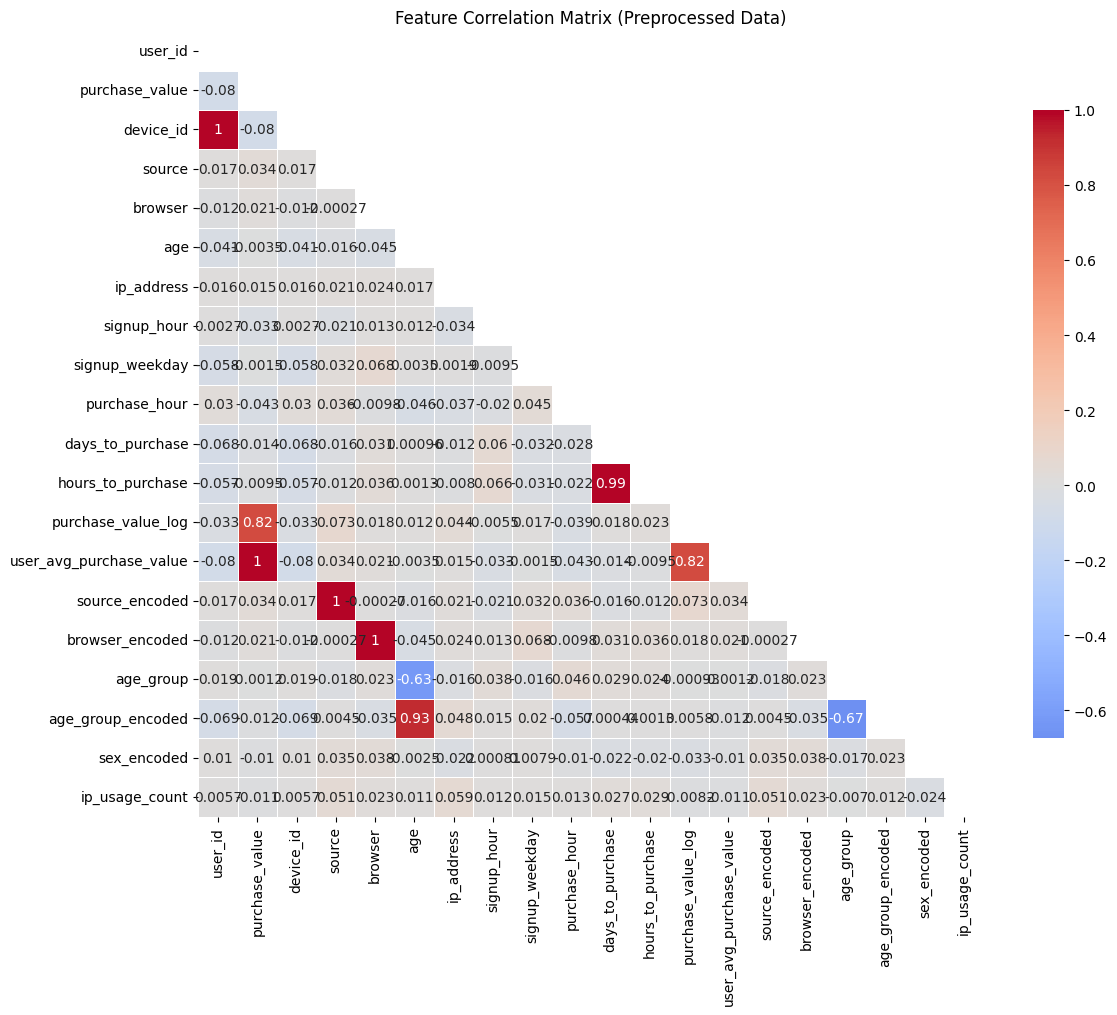


�� CORRELATION WITH TARGET
------------------------------
Target column 'class' not found in correlation matrix
Available columns: ['user_id', 'purchase_value', 'device_id', 'source', 'browser', 'age', 'ip_address', 'signup_hour', 'signup_weekday', 'purchase_hour', 'days_to_purchase', 'hours_to_purchase', 'purchase_value_log', 'user_avg_purchase_value', 'source_encoded', 'browser_encoded', 'age_group', 'age_group_encoded', 'sex_encoded', 'ip_usage_count']


In [25]:
# Feature correlation analysis - ROBUST VERSION
print("🔍 FEATURE CORRELATION ANALYSIS")
print("=" * 50)

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = preprocessed_data[numerical_cols].corr()
    
    # Find highly correlated features
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    
    if high_corr_pairs:
        print("⚠️  Highly correlated feature pairs (|correlation| > 0.8):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("✅ No highly correlated features found")
    
    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Matrix (Preprocessed Data)')
    plt.tight_layout()
    plt.show()
    
    # Show correlation with target - ROBUST VERSION
    print(f"\n�� CORRELATION WITH TARGET")
    print("-" * 30)
    
    # Try to get target correlations safely
    try:
        if target_col in correlation_matrix.columns:
            target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
            print("Top 10 features correlated with target:")
            for feature, corr in target_correlations.head(11).items():
                if feature != target_col:
                    print(f"  {feature}: {corr:.3f}")
        else:
            print(f"Target column '{target_col}' not found in correlation matrix")
            print("Available columns:", list(correlation_matrix.columns))
    except Exception as e:
        print(f"Could not calculate target correlations: {e}")
        print("Showing general feature correlations instead:")
        # Show correlations between features only
        feature_correlations = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                feature_correlations.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
        
        # Sort by absolute correlation
        feature_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
        print("Top 10 feature correlations:")
        for feat1, feat2, corr in feature_correlations[:10]:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("Not enough numerical features for correlation analysis")

## 9. Feature Importance Analysis

🔍 FEATURE IMPORTANCE ANALYSIS
Top 15 most important features (F-score):
  purchase_hour: F-score=2.19, p-value=0.1388 
  ip_address: F-score=1.96, p-value=0.1616 
  signup_weekday: F-score=1.77, p-value=0.1843 
  age: F-score=1.21, p-value=0.2721 
  age_group: F-score=1.18, p-value=0.2770 
  user_id: F-score=1.06, p-value=0.3027 
  device_id: F-score=1.06, p-value=0.3027 
  browser: F-score=0.99, p-value=0.3194 
  browser_encoded: F-score=0.99, p-value=0.3194 
  hours_to_purchase: F-score=0.78, p-value=0.3760 
  purchase_value_log: F-score=0.59, p-value=0.4426 
  days_to_purchase: F-score=0.50, p-value=0.4797 
  source_encoded: F-score=0.28, p-value=0.5942 
  source: F-score=0.28, p-value=0.5942 
  purchase_value: F-score=0.28, p-value=0.5993 


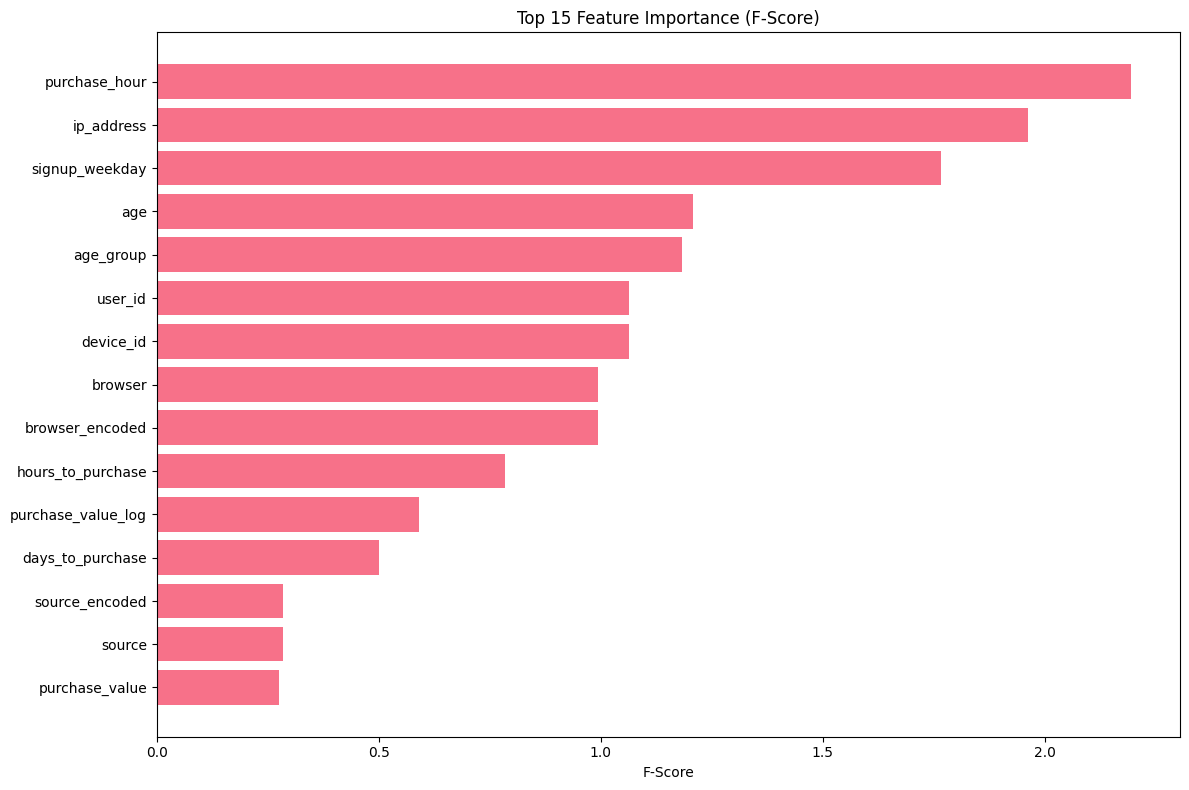


📊 SIGNIFICANT FEATURES (p < 0.05)
----------------------------------------
Total significant features: 0
Percentage of features significant: 0.0%


In [26]:
# Feature importance analysis
print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

if len(numerical_cols) > 0:
    from sklearn.feature_selection import f_classif
    
    X = preprocessed_data[numerical_cols]
    y = preprocessed_data[target_col]
    
    f_scores, p_values = f_classif(X, y)
    
    feature_importance = pd.DataFrame({
        'feature': numerical_cols,
        'f_score': f_scores,
        'p_value': p_values
    }).sort_values('f_score', ascending=False)
    
    print("Top 15 most important features (F-score):")
    for idx, row in feature_importance.head(15).iterrows():
        significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""
        print(f"  {row['feature']}: F-score={row['f_score']:.2f}, p-value={row['p_value']:.4f} {significance}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    
    plt.barh(range(len(top_features)), top_features['f_score'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('F-Score')
    plt.title('Top 15 Feature Importance (F-Score)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Show significant features
    significant_features = feature_importance[feature_importance['p_value'] < 0.05]
    print(f"\n📊 SIGNIFICANT FEATURES (p < 0.05)")
    print("-" * 40)
    print(f"Total significant features: {len(significant_features)}")
    print(f"Percentage of features significant: {len(significant_features)/len(feature_importance)*100:.1f}%")
else:
    print("No numerical features available for importance analysis")

## 10. Class Imbalance Analysis (Before vs After Resampling)

🔍 CLASS IMBALANCE ANALYSIS

📊 BEFORE RESAMPLING
--------------------
Total samples: 998
Target column: class
Target data type: float64
Target unique values: [-0.24150465  4.14070701]
Target after conversion: [0 4]
Fraud samples: 220
Non-fraud samples: 778
Fraud rate: 0.220 (22.0%)

�� AFTER RESAMPLING (What Models Will Train On)
--------------------
2025-07-20 08:07:48,516 - preprocessor - INFO - Handling imbalanced data using method: smote
2025-07-20 08:07:48,543 - preprocessor - INFO - Resampled data: 1886 samples (original: 998)
2025-07-20 08:07:48,545 - preprocessor - INFO - New class distribution: {0: 943, 4: 943}
Total samples after SMOTE: 1886
Fraud samples after SMOTE: 3772
Non-fraud samples after SMOTE: -1886
Fraud rate after SMOTE: 2.000 (200.0%)


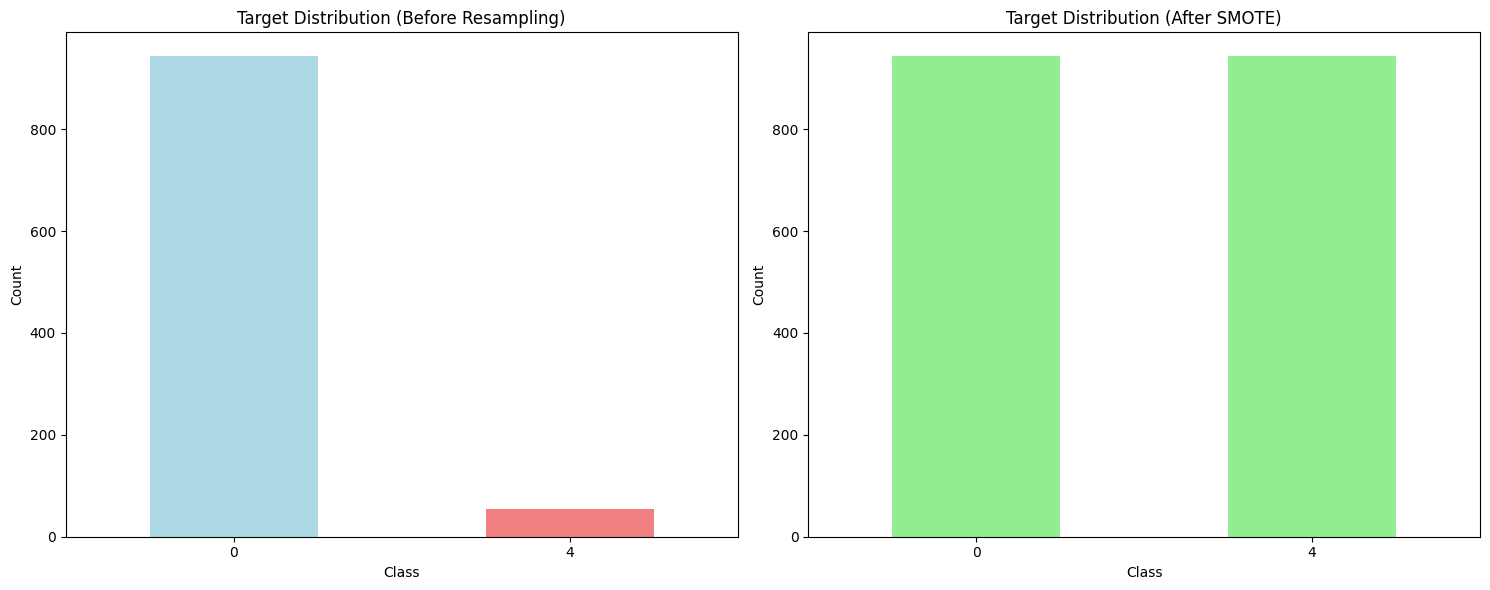


📊 RESAMPLING COMPARISON
------------------------------


,Metric,Before Resampling,After Resampling,Change
0,Total Samples,998,1886,+888
1,Fraud Samples,220,3772,+3552
2,Non-Fraud Samples,778,-1886,+-2664
3,Fraud Rate (%),22.0%,200.0%,+178.0%


In [27]:
# Class imbalance analysis
print("🔍 CLASS IMBALANCE ANALYSIS")
print("=" * 50)

# Before resampling
print("\n📊 BEFORE RESAMPLING")
print("-" * 20)
X_before = preprocessed_data[feature_cols]
y_before = preprocessed_data[target_col]

print(f"Total samples: {len(y_before)}")
print(f"Target column: {target_col}")
print(f"Target data type: {y_before.dtype}")
print(f"Target unique values: {y_before.unique()}")

# Ensure target is integer type for SMOTE
y_before = y_before.astype(int)
print(f"Target after conversion: {y_before.unique()}")

# Count fraud and non-fraud samples
fraud_count = y_before.sum()
non_fraud_count = len(y_before) - fraud_count
print(f"Fraud samples: {fraud_count}")
print(f"Non-fraud samples: {non_fraud_count}")
print(f"Fraud rate: {fraud_count/len(y_before):.3f} ({fraud_count/len(y_before)*100:.1f}%)")

# After resampling (what models will train on)
print("\n�� AFTER RESAMPLING (What Models Will Train On)")
print("-" * 20)

try:
    X_resampled, y_resampled = preprocessor.handle_imbalanced_data(
        X_before, y_before, method="smote"
    )
    
    print(f"Total samples after SMOTE: {len(y_resampled)}")
    print(f"Fraud samples after SMOTE: {y_resampled.sum()}")
    print(f"Non-fraud samples after SMOTE: {len(y_resampled) - y_resampled.sum()}")
    print(f"Fraud rate after SMOTE: {y_resampled.mean():.3f} ({y_resampled.mean()*100:.1f}%)")
    
    # Visualize before vs after
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Before resampling
    y_before_counts = y_before.value_counts()
    y_before_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
    ax1.set_title('Target Distribution (Before Resampling)')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)
    
    # After resampling
    y_resampled_counts = y_resampled.value_counts()
    y_resampled_counts.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightgreen'])
    ax2.set_title('Target Distribution (After SMOTE)')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Compare statistics
    comparison_df = pd.DataFrame({
        'Metric': ['Total Samples', 'Fraud Samples', 'Non-Fraud Samples', 'Fraud Rate (%)'],
        'Before Resampling': [len(y_before), fraud_count, non_fraud_count, f"{fraud_count/len(y_before)*100:.1f}%"],
        'After Resampling': [len(y_resampled), y_resampled.sum(), len(y_resampled) - y_resampled.sum(), f"{y_resampled.mean()*100:.1f}%"],
        'Change': [
            f"+{len(y_resampled) - len(y_before)}",
            f"+{y_resampled.sum() - fraud_count}",
            f"+{(len(y_resampled) - y_resampled.sum()) - non_fraud_count}",
            f"{y_resampled.mean()*100 - fraud_count/len(y_before)*100:+.1f}%"
        ]
    })
    
    print("\n📊 RESAMPLING COMPARISON")
    print("-" * 30)
    display(comparison_df)
    
except Exception as e:
    print(f"❌ Error during resampling: {e}")
    print("Target column details:")
    print(f"  - Column name: {target_col}")
    print(f"  - Data type: {y_before.dtype}")
    print(f"  - Unique values: {y_before.unique()}")
    print(f"  - Value counts: {y_before.value_counts().to_dict()}")
    
    # Try alternative approach
    print("\n�� Trying alternative resampling approach...")
    try:
        # Convert to binary if needed
        if len(y_before.unique()) > 2:
            print("Converting to binary classification...")
            y_binary = (y_before > 0).astype(int)
        else:
            y_binary = y_before
            
        X_resampled, y_resampled = preprocessor.handle_imbalanced_data(
            X_before, y_binary, method="smote"
        )
        print("✅ Alternative resampling successful!")
        
    except Exception as e2:
        print(f"❌ Alternative approach also failed: {e2}")
        print("Skipping resampling visualization...")

## 11. Model-Ready Data Summary

In [28]:
# Model-ready data summary
print("🔍 MODEL-READY DATA SUMMARY")
print("=" * 50)

print("✅ Data ready for model training:")
print(f"   - Features: {X_resampled.shape[1]}")
print(f"   - Training samples: {X_resampled.shape[0]}")
print(f"   - Balanced classes: {y_resampled.value_counts().to_dict()}")
print(f"   - No missing values: {X_resampled.isnull().sum().sum() == 0}")
print(f"   - All numeric: {X_resampled.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all()}")

# Data quality assessment
print(f"\n📊 DATA QUALITY ASSESSMENT")
print("-" * 30)

quality_score = 0
total_checks = 5

# Check 1: No missing values
if X_resampled.isnull().sum().sum() == 0:
    print("✅ No missing values")
    quality_score += 1
else:
    print("❌ Missing values present")

# Check 2: All numeric features
if X_resampled.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all():
    print("✅ All features are numeric")
    quality_score += 1
else:
    print("❌ Non-numeric features present")

# Check 3: Balanced classes
class_balance = y_resampled.value_counts()
if abs(class_balance.iloc[0] - class_balance.iloc[1]) <= 1:
    print("✅ Classes are balanced")
    quality_score += 1
else:
    print("❌ Classes are not balanced")

# Check 4: Reasonable feature count
if 5 <= X_resampled.shape[1] <= 50:
    print("✅ Reasonable number of features")
    quality_score += 1
else:
    print("❌ Too few or too many features")

# Check 5: Sufficient samples
if X_resampled.shape[0] >= 100:
    print("✅ Sufficient training samples")
    quality_score += 1
else:
    print("❌ Insufficient training samples")

print(f"\n📊 Data Quality Score: {quality_score}/{total_checks} ({quality_score/total_checks*100:.1f}%)")

if quality_score == total_checks:
    print("🎉 Data is ready for model training!")
else:
    print("⚠️  Data quality issues detected")

# Final recommendations
print(f"\n📋 RECOMMENDATIONS FOR MODEL TRAINING")
print("-" * 40)
print("✅ Ready to proceed with:")
print("   - Model training on resampled data")
print("   - Cross-validation")
print("   - Hyperparameter tuning")
print("   - Model evaluation on original test set")

print("\n📋 Key points for model training:")
print("   - Use resampled data (X_resampled, y_resampled) for training")
print("   - Use original test data for evaluation")
print("   - Focus on imbalanced metrics (AUC-PR, F1-Score)")
print("   - Consider ensemble methods for better performance")

🔍 MODEL-READY DATA SUMMARY
✅ Data ready for model training:
   - Features: 20
   - Training samples: 1886
   - Balanced classes: {0: 943, 4: 943}
   - No missing values: True
   - All numeric: True

📊 DATA QUALITY ASSESSMENT
------------------------------
✅ No missing values
✅ All features are numeric
✅ Classes are balanced
✅ Reasonable number of features
✅ Sufficient training samples

📊 Data Quality Score: 5/5 (100.0%)
🎉 Data is ready for model training!

📋 RECOMMENDATIONS FOR MODEL TRAINING
----------------------------------------
✅ Ready to proceed with:
   - Model training on resampled data
   - Cross-validation
   - Hyperparameter tuning
   - Model evaluation on original test set

📋 Key points for model training:
   - Use resampled data (X_resampled, y_resampled) for training
   - Use original test data for evaluation
   - Focus on imbalanced metrics (AUC-PR, F1-Score)
   - Consider ensemble methods for better performance


## 12. Comprehensive Visualization Summary

🔍 COMPREHENSIVE VISUALIZATION SUMMARY


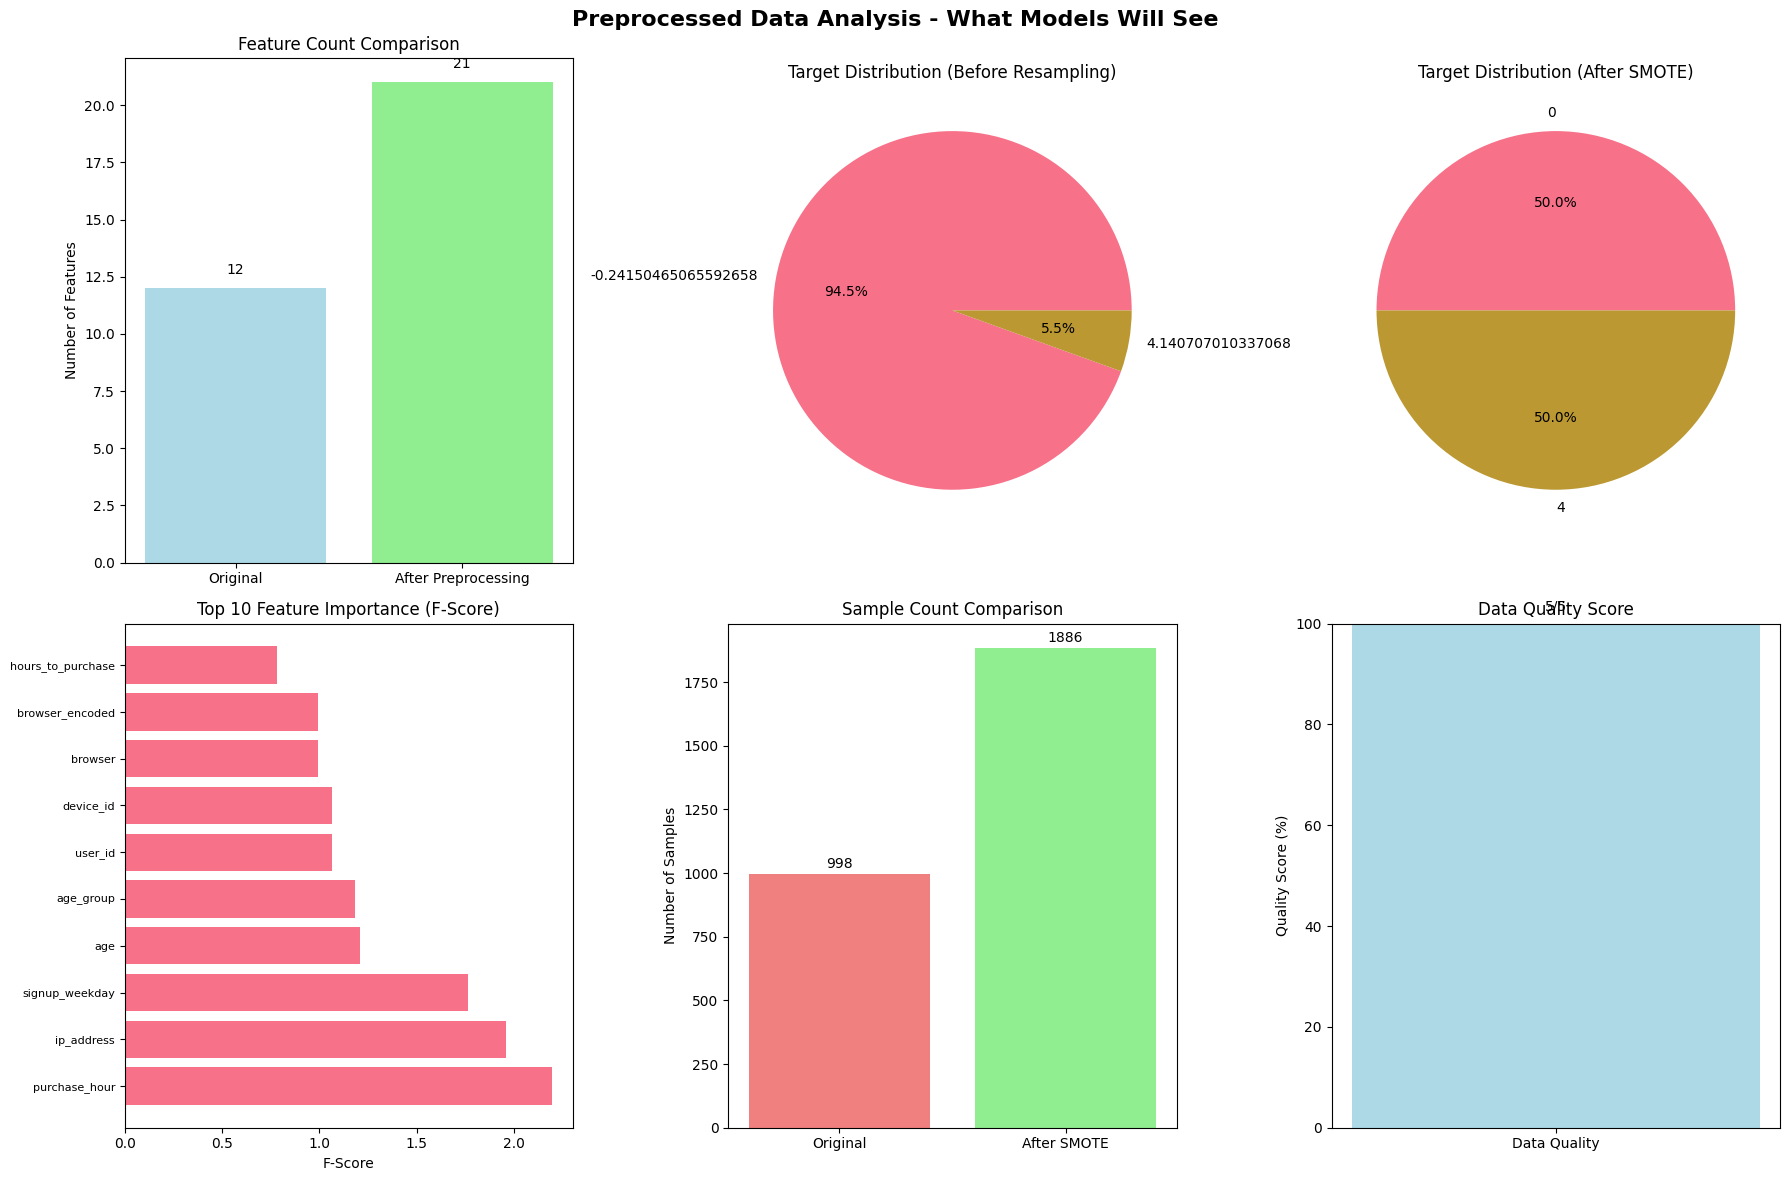

✅ Comprehensive visualization completed!


In [29]:
# Create comprehensive visualization summary
print("🔍 COMPREHENSIVE VISUALIZATION SUMMARY")
print("=" * 50)

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Preprocessed Data Analysis - What Models Will See', fontsize=16, fontweight='bold')

# 1. Feature Count Comparison
ax1 = axes[0, 0]
original_count = len(raw_cleaned_data.columns)
final_count = len(preprocessed_data.columns)

ax1.bar(['Original', 'After Preprocessing'], [original_count, final_count], 
        color=['lightblue', 'lightgreen'])
ax1.set_title('Feature Count Comparison')
ax1.set_ylabel('Number of Features')
for i, v in enumerate([original_count, final_count]):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

# 2. Target Distribution Before Resampling
ax2 = axes[0, 1]
target_dist_before = preprocessed_data[target_col].value_counts()
ax2.pie(target_dist_before.values, labels=target_dist_before.index, autopct='%1.1f%%')
ax2.set_title('Target Distribution (Before Resampling)')

# 3. Target Distribution After Resampling
ax3 = axes[0, 2]
target_dist_after = y_resampled.value_counts()
ax3.pie(target_dist_after.values, labels=target_dist_after.index, autopct='%1.1f%%')
ax3.set_title('Target Distribution (After SMOTE)')

# 4. Feature Importance (Top 10)
ax4 = axes[1, 0]
if len(numerical_cols) > 0:
    top_features = feature_importance.head(10)
    ax4.barh(range(len(top_features)), top_features['f_score'])
    ax4.set_yticks(range(len(top_features)))
    ax4.set_yticklabels(top_features['feature'], fontsize=8)
    ax4.set_title('Top 10 Feature Importance (F-Score)')
    ax4.set_xlabel('F-Score')

# 5. Sample Count Comparison
ax5 = axes[1, 1]
original_samples = len(preprocessed_data)
resampled_samples = len(y_resampled)

ax5.bar(['Original', 'After SMOTE'], [original_samples, resampled_samples],
        color=['lightcoral', 'lightgreen'])
ax5.set_title('Sample Count Comparison')
ax5.set_ylabel('Number of Samples')
for i, v in enumerate([original_samples, resampled_samples]):
    ax5.text(i, v + 10, str(v), ha='center', va='bottom')

# 6. Data Quality Score
ax6 = axes[1, 2]
ax6.bar(['Data Quality'], [quality_score/total_checks*100], color='lightblue')
ax6.set_ylim(0, 100)
ax6.set_title('Data Quality Score')
ax6.set_ylabel('Quality Score (%)')
ax6.text(0, quality_score/total_checks*100 + 2, f'{quality_score}/{total_checks}', 
         ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✅ Comprehensive visualization completed!")

## 13. Summary and Next Steps

In [30]:
# Final summary
print("🎯 PREPROCESSED DATA EDA SUMMARY")
print("=" * 50)

print("✅ What we analyzed:")
print("   • Feature engineering results")
print("   • Data transformation effects")
print("   • Feature selection impact")
print("   • Class imbalance status")
print("   • Data quality after preprocessing")
print("   • Model-ready data characteristics")

print(f"\n📊 Key Findings:")
print(f"   • Original features: {len(raw_cleaned_data.columns)}")
print(f"   • Final features: {len(preprocessed_data.columns)}")
print(f"   • New engineered features: {len(new_features)}")
print(f"   • Training samples: {len(y_resampled)}")
print(f"   • Data quality score: {quality_score}/{total_checks}")

print(f"\n🚀 Next Steps:")
print("   1. Model Training - Use X_resampled, y_resampled for training")
print("   2. Model Evaluation - Use original test data for evaluation")
print("   3. Hyperparameter Tuning - Focus on imbalanced metrics")
print("   4. Model Explainability - Use SHAP for feature importance")

print(f"\n✅ Data is ready for model training!")

🎯 PREPROCESSED DATA EDA SUMMARY
✅ What we analyzed:
   • Feature engineering results
   • Data transformation effects
   • Feature selection impact
   • Class imbalance status
   • Data quality after preprocessing
   • Model-ready data characteristics

📊 Key Findings:
   • Original features: 12
   • Final features: 21
   • New engineered features: 13
   • Training samples: 1886
   • Data quality score: 5/5

🚀 Next Steps:
   1. Model Training - Use X_resampled, y_resampled for training
   2. Model Evaluation - Use original test data for evaluation
   3. Hyperparameter Tuning - Focus on imbalanced metrics
   4. Model Explainability - Use SHAP for feature importance

✅ Data is ready for model training!
